# P10 : Detection de faux billets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import du fichier CSV billet

# Informations sur les données
### ● length : la longueur du billet (en mm) ;
### ● height_left : la hauteur du billet (mesurée sur le côté gauche, en mm) ;
### ● height_right : la hauteur du billet (mesurée sur le côté droit, en mm) ;
### ● margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) 
### ● margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) 
### ● diagonal : la diagonale du billet (en mm).

In [2]:
# changement du fichier billet.csv
df_billet = pd.read_csv('billets.csv',sep=';')
df_billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [3]:
# Voir les statistiques de chaque colonne du tableau
df_billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [4]:
# Recherche des valeurs dupliquées
print('Valeurs dupliquées : ', df_billet.duplicated().sum())

Valeurs dupliquées :  0


On ne trouve pas de valeurs dupliquées dans nos données.

In [5]:
df_billet.info() # valeurs maquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
missing_rate = df_billet.isna().sum()/df_billet.shape[0]
missing_rate

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      0.024667
margin_up       0.000000
length          0.000000
dtype: float64

"Margin_low comprend 37 valeurs manquantes(1463 valeurs sur les 1500 attendues), soit 2% du dataframe.

la représentativité des valeurs manquantes dans le dataset etant faible (2%) nous pourvions les supprimer sans qu'ils aient un impact sur notre analyse. Mais nous allons faire une regression lineaire pour combler les valeurs manquantes.

## Regression Linéaire :
### Pour augmenter les chances d'avoir des résultats probant, on va chercher à augmenter, dans notre cas, remplacer les valeurs manquant via une méthode de régression linaire
### La régression linéaire sert à prévoir la valeur d'une variable en fonction de la valeur d'une ou d'autre variable

On cherche à voir s'il est possible calculer la variable margin_low en fonction des autres variables.

In [7]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression

# Separation des données
df_reg_lin_train = df_billet[df_billet['margin_low'].isnull() == False]
df_reg_lin_test = df_billet[df_billet['margin_low'].isna()]
df_reg_lin_test

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [8]:
# Création du modéle X,y sur margin_low
X_train = df_reg_lin_train.drop(['margin_low'], axis=1)
y_train = df_reg_lin_train['margin_low']


In [9]:
X_train

,is_genuine,diagonal,height_left,height_right,margin_up,length
0,True,171.81,104.86,104.95,2.89,112.83
1,True,171.46,103.36,103.66,2.99,113.09
2,True,172.69,104.48,103.50,2.94,113.16
3,True,171.36,103.91,103.94,3.01,113.51
4,True,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,3.09,111.28
1496,False,172.19,104.63,104.44,3.37,110.97
1497,False,171.80,104.01,104.12,3.36,111.95
1498,False,172.06,104.28,104.06,3.46,112.25


In [10]:
y_train

0       4.52
1       3.77
2       4.40
3       3.62
4       4.04
        ... 
1495    4.42
1496    5.27
1497    5.51
1498    5.17
1499    4.63
Name: margin_low, Length: 1463, dtype: float64

In [11]:
# affinage des résultats
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictions:
x_train = df_reg_lin_train[["is_genuine","diagonal","height_left","height_right", "margin_up", "length"]]
df_reg_lin_train["margin_low_pred"] = model.predict(x_train) # On va prédire les labels via les data donnée en param


C:\Users\Mannier\AppData\Local\Temp\ipykernel_21768\1945862615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_lin_train["margin_low_pred"] = model.predict(x_train) # On va prédire les labels via les data donnée en param


In [13]:
print("Coéfficients:", model.coef_)
# Le coefficient de régression indique dans quelle mesure la valeur d'une variable 
# dépendante varie avec la variation de la valeur de la variable indépendante 


# Il s'agit tout simplement des coef de chaque variable explication de notre model de regression linéaire

Coéfficients: [-1.14059676 -0.0130159   0.02829069  0.02674982 -0.21284432 -0.00388299]


### Interpretation du modèle

Nous utilisons la methode des Moindres Carrés ordinaires (MCO) pour ajuster notre modèle.
Ce qui va nous permettre d'optimiser notre modèle.

Le but c'est trouver la droite qui minimise l'écart précédent, de rechercher une relation affine qui lie X et Y

In [14]:
import statsmodels.formula.api as smf
# Instanciation:
reg_linb = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length + is_genuine", data = df_reg_lin_train)
# le ~ permet de séparer notre margin low dans un coté et on ajoute les nouvelle colonne dans notre matrice
# de conception
# Calculs:

res_lin = reg_linb.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          4.75e-299
Time:                        07:52:51   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

### Retirez les variables non significatives

Si nous définissons alpha=0,05 comme le seuil pour qu'une variable soir signficatif, nous pouvons la variable "lenght" qui est la moins significative (p_value=0.868)

In [15]:
# Instanciation:
reg_linb = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + is_genuine", data = df_reg_lin_train)

# Calculs:
res_lin = reg_linb.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          2.12e-300
Time:                        07:52:51   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4247      7

on supprime la variable "diagonal" qui est la moins significative (p_value=0.719)

In [16]:
# Instanciation:
reg_linb = smf.ols("margin_low ~ height_left + height_right + margin_up + is_genuine", data = df_reg_lin_train)

# Calculs:
res_lin = reg_linb.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          8.76e-302
Time:                        07:52:51   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3902      5

on supprime la variable "height_right" qui est la moins significative (p_value=0.496)

In [17]:
# Instanciation:
reg_linb = smf.ols("margin_low ~ height_left + margin_up + is_genuine", data = df_reg_lin_train)

# Calculs:
res_lin = reg_linb.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          3.63e-303
Time:                        07:52:51   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9104      4

on supprime la variable "height_left" qui est la moins significative (p_value=0.454)

In [18]:
# Instanciation:
reg_linb = smf.ols("margin_low ~ margin_up + is_genuine", data = df_reg_lin_train)

# Calculs:
res_lin = reg_linb.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          1.24e-304
Time:                        07:52:51   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

Nous avons maintenant un coefficient de determination R2 satisfaisant qui vaut 0,61. les variables sont aussi significatives.

### Recherche de colinéarité entre les variables
#### On va regarder si il y a une forte relation de dépendance linéaire (corrélation) entre plus de deux variables explicatives

#### Une colinéarité prononcée s’avère problématique, car elle peut augmenter la variance des coefficients de régression et les rendre instables et difficiles à interpréter.

Nous utilisons le Facteur d'Inflation de la Variance (VIF) pour detecter les colinéarités:
- En pratique, une valeur VIF>10 indique un problème de colinéarité éventuel.

Le VIF évalue si les facteurs sont corrélés les uns aux autres, ce qui pourrait influencer les autres facteurs et réduire la fiabilité du modèle.Si un VIF est supérieur à 10, on a une multi-colinéarité élevée

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Instanciation:
reg_linb = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length + is_genuine", 
                   data = df_reg_lin_train)
# Calculs:
res_lin = reg_linb.fit()

variables = res_lin.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[4.725732131263034,
 1.02819949790807,
 1.1737111515376197,
 1.3208356332473368,
 1.5960903251807717,
 3.6132551150015373]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

### Verification de l'Homoscédasticité
#### C-a-d qu'on va regarder si la variance des erreurs est constante dans le temps sinon il s'agit d'hétéroscédasticité

Nous utilisons le test statistique de Breusch-Pagan.
- H0 (hypothèse nulle) : homoscédasticité.
- Ha (hypothèse alternative) : hétéroscédasticité.

Si la p-value associée à un test d’hétéroscédasticité se trouve en-dessous d’un certain seuil (exemple : 0.05), on pourra dire que les données s’écartent significativement de l’homoscédasticité.

In [20]:
from statsmodels.stats.api import  het_breuschpagan

lagrande, pval, f, fpval = het_breuschpagan(res_lin.resid, res_lin.model.exog)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.463957971615917e-33


La p-valeur ici est inférieure à 5%, on rejette l'hypothèse H0 selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

### Normalité des résidus

Les résidus doivent être répartis selon la loi normale. On peut utiliser le test de Shapiro-Wilk
- Si p-value > 0.05 <-> Normalité.

Le test de Shapiro va permettre de voir si une population est normalement distribuée

In [21]:
#import statsmodels.api as sm
#import scipy.stats as stats


#fig = sm.qqplot(res_lin.resid, stats.t, fit=True,line='45')
#plt.title("QQ plot")
#plt.show()

In [22]:
from scipy.stats import shapiro

x, pval = shapiro(res_lin.resid) ; print(pval)

7.047739472909598e-06


Ici, l'hypothèse de normalité est remise en cause (p-value = 7.04e-06 < 0.05).

#### Application du modèle 

In [23]:
# Application du modele sur les donnees test
df_test = df_reg_lin_test.drop(['margin_low'], axis=1)

# Prediction des valeurs manquantes sur le dataset de test
y_pred = model.predict(df_test)
y_pred

array([4.06495361, 4.11199026, 4.13400328, 3.99357074, 4.1403993 ,
       4.09428392, 4.07412432, 4.12538999, 4.0807278 , 4.07363322,
       4.11897255, 4.18037978, 4.13648423, 4.05106842, 4.17837685,
       4.22555104, 4.11586845, 4.10284101, 4.08184346, 4.09276238,
       4.11250192, 4.15717623, 4.16028787, 4.12193808, 4.12353555,
       4.19842271, 4.10962313, 4.09696025, 4.13384101, 5.25968515,
       5.264817  , 5.28251853, 5.30206887, 5.20035843, 5.1754678 ,
       5.17345045, 5.24675055])

In [24]:
#On ajoute les résultats de la régression pour les valeurs manquantes dans le df_reg_lin_test
df_reg_lin_test.loc[df_reg_lin_test.margin_low.isnull(), 'margin_low'] = y_pred
df_billet = pd.concat([df_reg_lin_test, df_reg_lin_train] ,axis = 0)
df_billet = df_billet.drop(["margin_low_pred"], axis=1)
df_billet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 72 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


C:\Users\Mannier\AppData\Local\Temp\ipykernel_21768\2949993325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_lin_test.loc[df_reg_lin_test.margin_low.isnull(), 'margin_low'] = y_pred


In [25]:
df_billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.064954,3.25,112.79
99,True,171.93,104.07,104.18,4.111990,3.14,113.08
151,True,172.07,103.80,104.38,4.134003,3.02,112.93
197,True,171.45,103.66,103.80,3.993571,3.62,113.27
241,True,171.83,104.14,104.06,4.140399,3.02,112.36
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.420000,3.09,111.28
1496,False,172.19,104.63,104.44,5.270000,3.37,110.97
1497,False,171.80,104.01,104.12,5.510000,3.36,111.95
1498,False,172.06,104.28,104.06,5.170000,3.46,112.25


In [26]:
# Voir les statistiques de chaque colonne du tableau
df_billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.482844,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659899,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [27]:
# Description des donnés
description = df_billet.groupby('is_genuine').describe().T
print(description)

is_genuine               False         True
diagonal     count  500.000000  1000.000000
             mean   171.901160   171.987080
             std      0.306861     0.300441
             min    171.040000   171.040000
             25%    171.690000   171.790000
             50%    171.910000   171.990000
             75%    172.092500   172.200000
             max    173.010000   172.920000
height_left  count  500.000000  1000.000000
             mean   104.190340   103.949130
             std      0.223758     0.300231
             min    103.510000   103.140000
             25%    104.040000   103.740000
             50%    104.180000   103.950000
             75%    104.332500   104.140000
             max    104.880000   104.860000
height_right count  500.000000  1000.000000
             mean   104.143620   103.808650
             std      0.270878     0.291570
             min    103.430000   102.820000
             25%    103.950000   103.610000
             50%    104.160000  

Notre échantillon contient 1500 billets : 1000 vrais billets et 500 faux.

Portrait-robot du vrai billet :
- Hauteur mesurée à gauche : 103.94 mm.
- Hauteur mesurée à droite : 103.80 mm.
- Marge entre le bord supérieur et le bord de l'image : 4.11 mm.
- Marge entre le bord inférieur et le bord de l'image : 3.05mm.
- Longueur : 113.20 mm.
- Diagonale : 171.98 mm.

Portrait-robot du faux billet :
- Hauteur mesurée à gauche : 104.19 mm.
- Hauteur mesurée à droite : 104.14 mm.
- Marge entre le bord supérieur et le bord de l'image : 5.21 mm.
- Marge entre le bord inférieur et le bord de l'image : 3.35mm.
- Longueur : 111.63 mm.
- Diagonale : 171.90 mm.

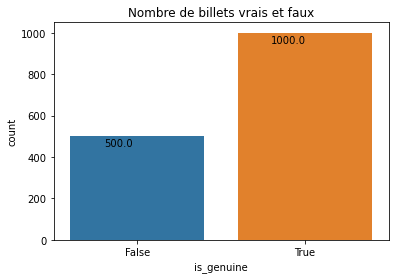

In [28]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_billet, x='is_genuine')
plt.title('Nombre de billets vrais et faux')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-50))
plt.show()

### On cherche à voir des caractéristiques des billets selon le fait qu'ils soient vrais ou faux.

C:\Users\Mannier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mannier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mannier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

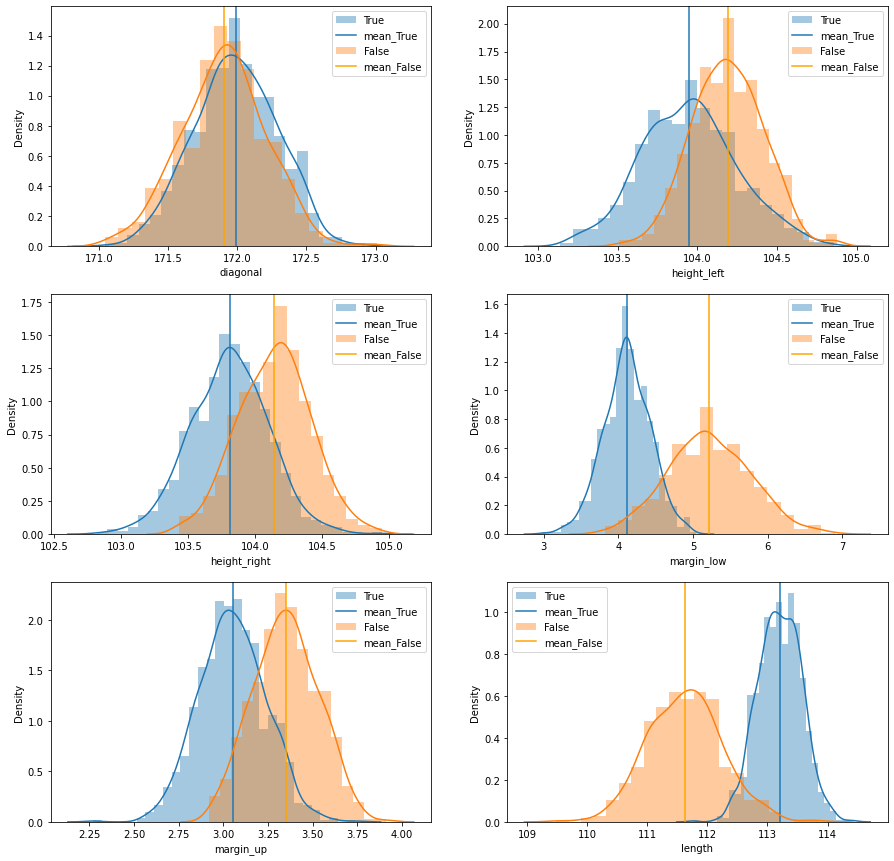

In [29]:
billet_vrai = df_billet[df_billet['is_genuine'] == True]
billet_faux = df_billet[df_billet['is_genuine'] == False]

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.distplot(billet_vrai['diagonal'],label='True')
plt.axvline(x = np.mean(billet_vrai['diagonal']),label='mean_True')
sns.distplot(billet_faux['diagonal'],label='False')
plt.axvline(x = np.mean(billet_faux['diagonal']),label='mean_False',color='orange')
plt.legend()

plt.subplot(3,2,2)
sns.distplot(billet_vrai['height_left'],label='True')
plt.axvline(x = np.mean(billet_vrai['height_left']),label='mean_True')
sns.distplot(billet_faux['height_left'],label='False')
plt.axvline(x = np.mean(billet_faux['height_left']),label='mean_False',color='orange')
plt.legend()

plt.subplot(3,2,3)
sns.distplot(billet_vrai['height_right'],label='True')
plt.axvline(x = np.mean(billet_vrai['height_right']),label='mean_True')
sns.distplot(billet_faux['height_right'],label='False')
plt.axvline(x = np.mean(billet_faux['height_right']),label='mean_False',color='orange')
plt.legend()

plt.subplot(3,2,4)
sns.distplot(billet_vrai['margin_low'],label='True')
plt.axvline(x = np.mean(billet_vrai['margin_low']),label='mean_True')
sns.distplot(billet_faux['margin_low'],label='False')
plt.axvline(x = np.mean(billet_faux['margin_low']),label='mean_False',color='orange')
plt.legend()

plt.subplot(3,2,5)
sns.distplot(billet_vrai['margin_up'],label='True')
plt.axvline(x = np.mean(billet_vrai['margin_up']),label='mean_True')
sns.distplot(billet_faux['margin_up'],label='False')
plt.axvline(x = np.mean(billet_faux['margin_up']),label='mean_False',color='orange')
plt.legend()

plt.subplot(3,2,6)
sns.distplot(billet_vrai['length'],label='True')
plt.axvline(x = np.mean(billet_vrai['length']),label='mean_True')
sns.distplot(billet_faux['length'],label='False')
plt.axvline(x = np.mean(billet_faux['length']),label='mean_False',color='orange')
plt.legend()

Des différences apparaissent particulièrement pour les variables suivantes :
- Margin_low
- length

Les vrais billets ont tendance à être plus long que les faux billets

### Test statistique: Test student

On cherche à voir si les billets vrais et faux ont des hauteurs gauche et droite, marge basse et haute et des longueurs significativement différentes
(c-a-d on va regarder si il y a des indépendance ou des dépendance des score entre chaque variable)
- H0 : Les caractéristiques moyennes sont EGALES chez les billets vrais comme faux si p-value > 5%
- H1 : Les caractéristiques moyennes ne sont EGALES chez les billets vrais comme faux si p-value < 5%

In [30]:
from scipy.stats import ttest_ind

#echantillonner df billet_vrai et billet_faux de manière à avoir le même nombre d'individus dans chacun d'eux.
balanced_vrai = billet_vrai.sample(billet_faux.shape[0])

def t_test(col) :
    alpha = 0.05
    stat, p = ttest_ind(balanced_vrai[col].dropna(), billet_faux[col].dropna())
    if p < alpha:
        return p, "H0 rejetée"
    else :
        return "0"

In [31]:
 for col in df_billet.columns[1:]:
    print(col)
    print('p_value', t_test(col))
    print("_______")
    print()

diagonal
p_value (1.642392213107797e-05, 'H0 rejetée')
_______

height_left
p_value (3.4281257630762227e-44, 'H0 rejetée')
_______

height_right
p_value (1.3645133997936038e-72, 'H0 rejetée')
_______

margin_low
p_value (6.354662766183963e-200, 'H0 rejetée')
_______

margin_up
p_value (9.151312601145279e-121, 'H0 rejetée')
_______

length
p_value (3.2138098067032207e-268, 'H0 rejetée')
_______



Tous les p_value sont < 5%, on peut donc considerer qu'il a une différence entre les vrais billets et les faux billets selon les variables de dimensions qui les caractérisent.

### Matrice de corrélation 

In [32]:
#La matrice de correlation
matrix = df_billet.corr()
matrix

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.786177,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.110639,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.308724,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.390948,0.307005,-0.401751
margin_low,-0.786177,-0.110639,0.308724,0.390948,1.000000,0.429600,-0.668445
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.429600,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.668445,-0.520575,1.000000


La matrice des corrélations résume les dépendances entre variables par une valeur entre -1 et 1 :

- 0 : absence de corrélation
- 1 : corrélation positive
- -1 : corrélation négative

C:\Users\Mannier\AppData\Local\Temp\ipykernel_21768\2272236543.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(matrix, dtype=np.bool))


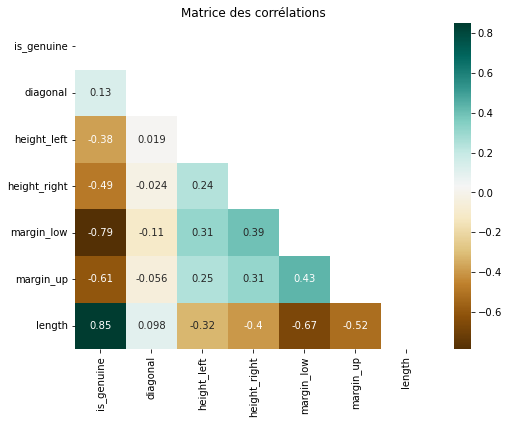

In [33]:
mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.title('Matrice des corrélations')
plt.show()

La matrice de corrélation confirme l'impact de la longueur et de la marge basse sur l'authenticité. On dit donc que la véracité du billet est corrélée positivement à la longueur, et négativement à la marge basse. Les variables ont toutes des dépendances plus ou moins marquées avec les autres, à part dans une moindre mesure la diagonale.

## Partitionnement des données

L'objectif est de partager les données en groupes homogènes. Pour cela nous pouvons utiliser la méthode de classification Kmeans.

In [34]:
df_kmeans = df_billet.drop(columns= ['is_genuine'])
df_kmeans

,diagonal,height_left,height_right,margin_low,margin_up,length
72,171.94,103.89,103.45,4.064954,3.25,112.79
99,171.93,104.07,104.18,4.111990,3.14,113.08
151,172.07,103.80,104.38,4.134003,3.02,112.93
197,171.45,103.66,103.80,3.993571,3.62,113.27
241,171.83,104.14,104.06,4.140399,3.02,112.36
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.420000,3.09,111.28
1496,172.19,104.63,104.44,5.270000,3.37,110.97
1497,171.80,104.01,104.12,5.510000,3.36,111.95
1498,172.06,104.28,104.06,5.170000,3.46,112.25


### Méthode du coude :

Pour visualiser le nombre de clusters optimum, nous allons utiliser la methode du ' Elbow ' :

C:\Users\Mannier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


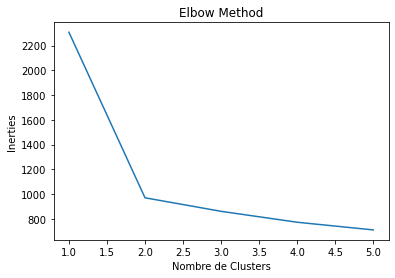

In [35]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
mapping1 = {}
for i in range(1,6):
    km=KMeans(n_clusters=i)
    km.fit(df_kmeans)
    wcss.append(km.inertia_)
    mapping1[i] = km.inertia_
plt.plot(range(1,6),wcss)
plt.title('Elbow Method')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inerties')
plt.show()

In [36]:
#for key,val in mapping1.items(): 
#    print(str(key)+' : '+str(val))

On définit 2 clusters avec la méthode du coude. On va pouvoir utiliser un algorithme du KMeans pour effectuer notre classification.

In [37]:
# Clustering par K-means: n_clusters = 2
km = KMeans(n_clusters=2)
km.fit(df_kmeans)
clusters_km = km.labels_
clusters_km = np.invert(clusters_km.astype('bool')) #inverser True & False to have same is_genuine

In [38]:
# Ajout d'une colonne contenant le cluster attribue:
df_kmeans['Clusterkm'] = clusters_km
df_kmeans

,diagonal,height_left,height_right,margin_low,margin_up,length,Clusterkm
72,171.94,103.89,103.45,4.064954,3.25,112.79,True
99,171.93,104.07,104.18,4.111990,3.14,113.08,True
151,172.07,103.80,104.38,4.134003,3.02,112.93,True
197,171.45,103.66,103.80,3.993571,3.62,113.27,True
241,171.83,104.14,104.06,4.140399,3.02,112.36,True
...,...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.420000,3.09,111.28,False
1496,172.19,104.63,104.44,5.270000,3.37,110.97,False
1497,171.80,104.01,104.12,5.510000,3.36,111.95,False
1498,172.06,104.28,104.06,5.170000,3.46,112.25,False


In [39]:
df_kmeans['is_genuine'] = df_billet['is_genuine']
df_kmeans

,diagonal,height_left,height_right,margin_low,margin_up,length,Clusterkm,is_genuine
72,171.94,103.89,103.45,4.064954,3.25,112.79,True,True
99,171.93,104.07,104.18,4.111990,3.14,113.08,True,True
151,172.07,103.80,104.38,4.134003,3.02,112.93,True,True
197,171.45,103.66,103.80,3.993571,3.62,113.27,True,True
241,171.83,104.14,104.06,4.140399,3.02,112.36,True,True
...,...,...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.420000,3.09,111.28,False,False
1496,172.19,104.63,104.44,5.270000,3.37,110.97,False,False
1497,171.80,104.01,104.12,5.510000,3.36,111.95,False,False
1498,172.06,104.28,104.06,5.170000,3.46,112.25,False,False


In [40]:
from sklearn import decomposition, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

centroids_km = km.cluster_centers_

# Clustering par projection des individus sur le premier plan factoriel: (centrer réduire)
pca_km = decomposition.PCA(n_components=3).fit(df_kmeans[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
acp_km = PCA(n_components=3).fit_transform(df_kmeans[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

centroids_km_projected = pca_km.transform(centroids_km)


C:\Users\Mannier\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


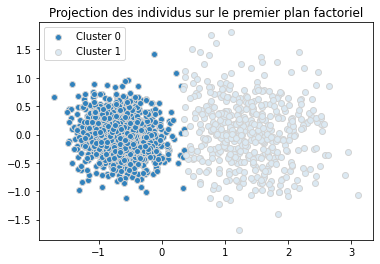

In [41]:
# Graphique:
for couleur,k in zip(["#3182bd","#dbe9f3"],[0,1]):
    plt.scatter(acp_km[km.labels_==k,0],acp_km[km.labels_==k,1],c=couleur,edgecolors="#D3D3D3",label="Cluster {}".format(k))
    plt.legend()
    
plt.title("Projection des individus sur le premier plan factoriel".format(len(centroids_km)))
plt.show()

### Verification de la classification avec la Matrice de confusion.

In [42]:
#Verification de la classification: Matrice de confusion:
km_matrix = pd.crosstab(clusters_km,df_kmeans["is_genuine"])
print(km_matrix)

is_genuine  False  True
row_0                  
False         481     2
True           19   998


Text(0.5, 1.0, 'Matrice de confusion K-means\n')

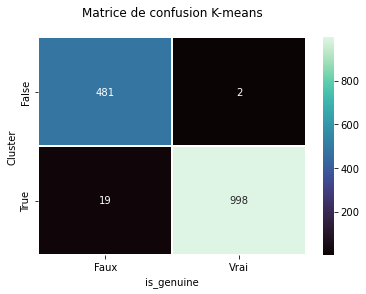

In [43]:
# Graphique:
sns.heatmap(km_matrix,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["False","True"]
            )
plt.xlabel("is_genuine")
plt.ylabel("Cluster")
plt.title("Matrice de confusion K-means\n")

Interprétation de la matrice de confusion :

Parmi les 1000 vrais billets :
- 998 ont été bien placés (vrais billets)
- 2 ont été prédis comme étant faux

Parmi les 500 faux billets :
- 481 sont biens placés (faux billets)
- 19 sont prédis comme étant vrais 

In [44]:
vrai_negatif = km_matrix.loc[0,0]
faux_negatif = km_matrix.loc[1,0]
faux_positif = km_matrix.loc[0,1]
vrai_positif = km_matrix.loc[1,1]

# Calcul de la précision
Taux_precision = (float (vrai_positif + vrai_negatif) / float(vrai_negatif + faux_positif + faux_negatif + vrai_positif))
print('Le taux precision est', round((Taux_precision)*100,2), '%')

Taux_erreur = (faux_positif + faux_negatif) / (vrai_negatif+faux_positif+faux_negatif+vrai_positif)
print('Le taux erreur est de', round((Taux_erreur)*100,2), '%')

Le taux precision est 98.6 %
Le taux erreur est de 1.4 %


## Regression Logistique

L'objectif de la régression logistique est de créer un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet, de donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

In [45]:
df_reg_log = df_billet
df_reg_log

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.064954,3.25,112.79
99,True,171.93,104.07,104.18,4.111990,3.14,113.08
151,True,172.07,103.80,104.38,4.134003,3.02,112.93
197,True,171.45,103.66,103.80,3.993571,3.62,113.27
241,True,171.83,104.14,104.06,4.140399,3.02,112.36
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.420000,3.09,111.28
1496,False,172.19,104.63,104.44,5.270000,3.37,110.97
1497,False,171.80,104.01,104.12,5.510000,3.36,111.95
1498,False,172.06,104.28,104.06,5.170000,3.46,112.25


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Variables explicatives
X = df_reg_log.drop(['is_genuine'], axis=1)
# Variable à expliquer
y = df_reg_log['is_genuine']

# Partition aléatoire du jeu de données en 80% pour créer le modèle, 20% pour tester le modèle
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

# Régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_predicted = model.predict(X_test)
model.predict_proba(X_test)

array([[8.58667245e-04, 9.99141333e-01],
       [5.24017584e-03, 9.94759824e-01],
       [1.81312132e-03, 9.98186879e-01],
       [9.96409807e-01, 3.59019326e-03],
       [2.60278832e-04, 9.99739721e-01],
       [3.08749520e-02, 9.69125048e-01],
       [4.97993853e-04, 9.99502006e-01],
       [9.61797803e-01, 3.82021968e-02],
       [6.15431045e-03, 9.93845690e-01],
       [9.99972104e-01, 2.78964518e-05],
       [9.93812882e-01, 6.18711829e-03],
       [9.99969985e-01, 3.00147657e-05],
       [9.46653688e-03, 9.90533463e-01],
       [9.99979806e-01, 2.01942841e-05],
       [2.13800518e-02, 9.78619948e-01],
       [9.99471090e-01, 5.28909596e-04],
       [2.72374620e-03, 9.97276254e-01],
       [9.99773641e-01, 2.26359344e-04],
       [4.18540083e-04, 9.99581460e-01],
       [9.94656949e-01, 5.34305095e-03],
       [9.94109835e-01, 5.89016506e-03],
       [9.87168010e-01, 1.28319899e-02],
       [7.83662318e-03, 9.92163377e-01],
       [9.09484264e-05, 9.99909052e-01],
       [9.955300

In [48]:
from sklearn.metrics import accuracy_score
df_reg_log['prediction']=model.predict(X)

#model_accuracy_score = round(accuracy_score(df_reg_log['is_genuine'],df_reg_log['prediction']),3)
#model_accuracy_score

In [49]:
#print('Train_score', model.score(X_train,y_train))
#print('Test_score', model.score(X_test,y_test))
df_reg_log

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,prediction
72,True,171.94,103.89,103.45,4.064954,3.25,112.79,True
99,True,171.93,104.07,104.18,4.111990,3.14,113.08,True
151,True,172.07,103.80,104.38,4.134003,3.02,112.93,True
197,True,171.45,103.66,103.80,3.993571,3.62,113.27,True
241,True,171.83,104.14,104.06,4.140399,3.02,112.36,True
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.420000,3.09,111.28,False
1496,False,172.19,104.63,104.44,5.270000,3.37,110.97,False
1497,False,171.80,104.01,104.12,5.510000,3.36,111.95,False
1498,False,172.06,104.28,104.06,5.170000,3.46,112.25,False


In [50]:
conf_mat = pd.crosstab(df_reg_log['prediction'],df_reg_log['is_genuine'])
conf_mat

is_genuine,False,True
prediction,,
False,491,5
True,9,995


Text(0.5, 1.0, 'Matrice de confusion')

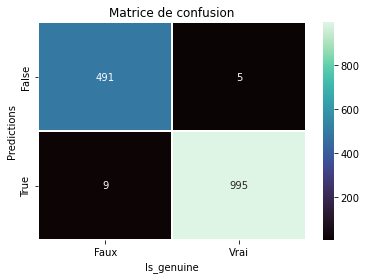

In [51]:
# Graphique:
sns.heatmap(conf_mat,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["False","True"]
            )
plt.xlabel("Is_genuine")
plt.ylabel("Predictions")
plt.title("Matrice de confusion")

Interprétation de la matrice de confusion :
Parmi les 1000 vrais billets :

- 996 ont été bien placés (vrais billets)
- 5 ont été prédis comme étant faux 

Parmi les 500 faux billets :
- 490 sont biens placés (faux billets)
- 9 sont prédis comme étant vrais

In [52]:
vrai_negatif = conf_mat.loc[0,0]
faux_negatif = conf_mat.loc[0,1]
faux_positif = conf_mat.loc[1,0]
vrai_positif = conf_mat.loc[1,1]

# Calcul de la sensibilité (taux de vrais positifs = Vrai_positif/(vrai_positif + faux_negatif))
Taux_sensitivite = (vrai_positif / float(vrai_positif + faux_negatif))

# Calcul de la spécificité (taux de vrais négatifs = Vrai_negatif/(vrai_negatif + faux_positif))
Taux_specificite = (vrai_negatif / float(vrai_negatif + faux_positif))

# Calcul de la précision 
Taux_precision = (float (vrai_positif + vrai_negatif) / float(vrai_negatif + faux_positif + faux_negatif + vrai_positif))

# Calcul d'erreur
Taux_erreur = (faux_positif + faux_negatif) / (vrai_negatif + faux_positif + faux_negatif + vrai_positif)

#print("sensivity =",round((Taux_sensitivite)*100,2),'%')
#print("specificity =",round((Taux_specificite)*100,2),'%')
print('Le taux precision est', round((Taux_precision)*100,2), '%')
print('Le taux erreur est de', round((Taux_erreur)*100,2), '%')

Le taux precision est 99.07 %
Le taux erreur est de 0.93 %


## Test nouvel échantillon

In [53]:
#df_billets_production = pd.read_csv('billets_production.csv')
#df_billets_production

In [54]:
# Préparation des données
#X = df_billets_production.drop(['id'], axis=1)

# Application du modèle
#predict = model.predict(X)

# Probabilités
#+model.predict_proba(X)

In [55]:
# Calcul des probas d'affectaion sur l'ech. à prédire
#probas = model.predict_proba(X)

#X['Probas_faux'] = probas[:,0]
#X['Probas_vrais'] = probas[:,1]
#X

In [56]:
#Ajout du resultat et création du df
#prediction=pd.DataFrame({'id': df_billets_production.id,
#                        'probalité_true' : round((X['Probas_vrais']*100),2).astype(str)+'%',
#                        'probalité_false' : round((X['Probas_faux']*100),2).astype(str)+'%',
#                        'prédiction' : predict})

#prediction

## Programme pour l'utilisation du modèle. 

In [57]:
#programme pour utiliser le modèle
def prediction(link):
    print("ici")
    df_test = pd.read_csv(link)
    x_pred= df_test.copy()
    x_pred = x_pred.drop(['id'], axis = 1)
    pred = model.predict(x_pred)
    prob = model.predict_proba(x_pred)
    df_test['proba_vrai']= prob[:,1]
    df_test['proba_faux']= prob[:,0]
    df_test['Prediction']= pred
    
    return df_test

In [59]:
prediction('billets_test.csv')

ici


,diagonal,height_left,height_right,margin_low,margin_up,length,id,proba_vrai,proba_faux,Prediction
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,0.988551,0.011449,True
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,0.007465,0.992535,False
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,0.999122,0.000878,True
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,0.000114,0.999886,False
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,0.011713,0.988287,False
